Microsoft が提供する衛星データ提供サービス　Planetary serviceについて

[Planetary Computer Service](https://planetarycomputer.microsoft.com/)

[Reading Data from the STAC API](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/)

In [1]:
!pip install pystac_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 5.9 MB/s eta 0:00:00


In [2]:
!pip install planetary_computer

In [3]:
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 39.3 MB/s eta 0:00:00


In [4]:
!pip install stackstac

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 2.5 MB/s eta 0:00:00


In [5]:
!pip install contextily

In [6]:

!pip install ipyleaflet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00


In [7]:
!pip install rasterio

In [8]:
import pystac_client
import planetary_computer

import geopandas


In [9]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [10]:
catalog

<Client id=microsoft-pc>

In [11]:
# 関連アイテムをグループ化し、アイテムの集約やメタデータの提供などを行う「コレクション」
# カタログはトップレベルのコレクション内に、カタログやコレクションなどのネストされたレイヤーを持てる
collections = [(c.id, c.title) for c in catalog.get_collections()]
collections

[('daymet-annual-pr', 'Daymet Annual Puerto Rico'),
 ('daymet-daily-hi', 'Daymet Daily Hawaii'),
 ('3dep-seamless', 'USGS 3DEP Seamless DEMs'),
 ('3dep-lidar-dsm', 'USGS 3DEP Lidar Digital Surface Model'),
 ('fia', 'Forest Inventory and Analysis'),
 ('sentinel-1-rtc', 'Sentinel 1 Radiometrically Terrain Corrected (RTC)'),
 ('gridmet', 'gridMET'),
 ('daymet-annual-na', 'Daymet Annual North America'),
 ('daymet-monthly-na', 'Daymet Monthly North America'),
 ('daymet-annual-hi', 'Daymet Annual Hawaii'),
 ('daymet-monthly-hi', 'Daymet Monthly Hawaii'),
 ('daymet-monthly-pr', 'Daymet Monthly Puerto Rico'),
 ('gnatsgo-tables', 'gNATSGO Soil Database - Tables'),
 ('hgb', 'HGB: Harmonized Global Biomass for 2010'),
 ('cop-dem-glo-30', 'Copernicus DEM GLO-30'),
 ('cop-dem-glo-90', 'Copernicus DEM GLO-90'),
 ('goes-cmi', 'GOES-R Cloud & Moisture Imagery'),
 ('terraclimate', 'TerraClimate'),
 ('nasa-nex-gddp-cmip6',
  'Earth Exchange Global Daily Downscaled Projections (NEX-GDDP-CMIP6)'),
 ('gpm-

Sentienl-2の観測データを確認する

In [12]:
time_range = "2024-07-01/2024-08-31" #2024/08/18時点のデータを確認
bbox =[137.1, 35.11, 140.1, 36.11] #関東周辺

search = catalog.search(collections=["sentinel-2-l2a"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)

/usr/local/lib/python3.11/dist-packages/pystac_client/item_search.py:896: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


280

In [13]:


df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df

,geometry,datetime,platform,instruments,s2:mgrs_tile,constellation,s2:granule_id,eo:cloud_cover,s2:datatake_id,s2:product_uri,...,s2:nodata_pixel_percentage,s2:unclassified_percentage,s2:not_vegetated_percentage,s2:degraded_msi_data_percentage,s2:high_proba_clouds_percentage,s2:reflectance_conversion_factor,s2:medium_proba_clouds_percentage,s2:saturated_defective_pixel_percentage,proj:code,s2:dark_features_percentage
0,"POLYGON ((140.04558 35.1505, 140.0709 35.24336...",2024-08-31T01:16:59.024000Z,Sentinel-2B,[msi],54SVE,Sentinel 2,S2B_OPER_MSI_L2A_TL_2BPS_20240831T031330_A0390...,100.000000,GS2B_20240831T011659_039096_N05.11,S2B_MSIL2A_20240831T011659_N0511_R031_T54SVE_2...,...,24.067104,0.000000,0.000000,1.6472,31.113636,0.980080,68.793815,0.0,EPSG:32654,NaN
1,"POLYGON ((139.90826 34.65035, 139.909 34.65307...",2024-08-31T01:16:59.024000Z,Sentinel-2B,[msi],54SVD,Sentinel 2,S2B_OPER_MSI_L2A_TL_2BPS_20240831T031330_A0390...,92.595840,GS2B_20240831T011659_039096_N05.11,S2B_MSIL2A_20240831T011659_N0511_R031_T54SVD_2...,...,4.398997,0.000000,0.000003,0.1649,29.530984,0.980080,47.095308,0.0,EPSG:32654,NaN
2,"POLYGON ((140.26048 36.05313, 140.02752 36.104...",2024-08-29T01:26:51.024000Z,Sentinel-2A,[msi],54SVF,Sentinel 2,S2A_OPER_MSI_L2A_TL_2APS_20240829T044911_A0479...,100.000000,GS2A_20240829T012651_047976_N05.11,S2A_MSIL2A_20240829T012651_N0511_R074_T54SVF_2...,...,1.255480,0.000000,0.000000,0.0220,5.219578,0.979206,94.780427,0.0,EPSG:32654,NaN
3,"POLYGON ((139.88552 36.31547, 140.09418 36.270...",2024-08-29T01:26:51.024000Z,Sentinel-2A,[msi],54SVF,Sentinel 2,S2A_OPER_MSI_L2A_TL_2APS_20240829T040048_A0479...,99.999571,GS2A_20240829T012651_047976_N05.11,S2A_MSIL2A_20240829T012651_N0511_R074_T54SVF_2...,...,87.573534,0.000000,0.000000,0.0192,23.715433,0.979206,76.267105,0.0,EPSG:32654,NaN
4,"POLYGON ((141.09364 35.85156, 140.82259 35.921...",2024-08-29T01:26:51.024000Z,Sentinel-2A,[msi],54SVE,Sentinel 2,S2A_OPER_MSI_L2A_TL_2APS_20240829T044911_A0479...,100.000000,GS2A_20240829T012651_047976_N05.11,S2A_MSIL2A_20240829T012651_N0511_R074_T54SVE_2...,...,85.085744,0.000000,0.000000,0.0220,28.590414,0.979206,71.409565,0.0,EPSG:32654,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,"POLYGON ((136.11148 36.13974, 137.33121 36.122...",2024-07-03T01:36:51.024000Z,Sentinel-2A,[msi],53SPV,Sentinel 2,S2A_OPER_MSI_L2A_TL_MSFT_20240703T064028_A0471...,76.154131,GS2A_20240703T013651_047161_N05.10,S2A_MSIL2A_20240703T013651_N0510_R117_T53SPV_2...,...,0.000000,0.374713,7.175962,0.0046,39.508393,0.967498,23.686394,0.0,EPSG:32653,0.026606
276,"POLYGON ((136.09904 35.23809, 137.30515 35.221...",2024-07-03T01:36:51.024000Z,Sentinel-2A,[msi],53SPU,Sentinel 2,S2A_OPER_MSI_L2A_TL_MSFT_20240703T064116_A0471...,75.608534,GS2A_20240703T013651_047161_N05.10,S2A_MSIL2A_20240703T013651_N0510_R117_T53SPU_2...,...,0.000000,0.324903,7.341482,0.0075,28.768292,0.967498,27.162221,0.0,EPSG:32653,0.022555
277,"POLYGON ((136.12449 37.04125, 137.35847 37.023...",2024-07-03T01:36:51.024000Z,Sentinel-2A,[msi],53SPA,Sentinel 2,S2A_OPER_MSI_L2A_TL_MSFT_20240703T063329_A0471...,70.451683,GS2A_20240703T013651_047161_N05.10,S2A_MSIL2A_20240703T013651_N0510_R117_T53SPA_2...,...,0.000000,0.695754,3.049223,0.0123,38.404584,0.967498,17.322105,0.0,EPSG:32653,0.003228
278,"POLYGON ((140.04971 35.15052, 140.06178 35.194...",2024-07-02T01:16:59.024000Z,Sentinel-2B,[msi],54SVE,Sentinel 2,S2B_OPER_MSI_L2A_TL_MSFT_20240702T044529_A0382...,72.930872,GS2B_20240702T011659_038238_N05.10,S2B_MSIL2A_20240702T011659_N0510_R031_T54SVE_2...,...,24.425045,0.234007,2.173444,0.0125,32.755363,0.967554,12.510072,0.0,EPSG:32654,0.001449


In [14]:
#列情報を取得

list(df.columns)


['geometry',
 'datetime',
 'platform',
 'instruments',
 's2:mgrs_tile',
 'constellation',
 's2:granule_id',
 'eo:cloud_cover',
 's2:datatake_id',
 's2:product_uri',
 's2:datastrip_id',
 's2:product_type',
 'sat:orbit_state',
 's2:datatake_type',
 's2:generation_time',
 'sat:relative_orbit',
 's2:water_percentage',
 's2:mean_solar_zenith',
 's2:mean_solar_azimuth',
 's2:processing_baseline',
 's2:snow_ice_percentage',
 's2:vegetation_percentage',
 's2:thin_cirrus_percentage',
 's2:cloud_shadow_percentage',
 's2:nodata_pixel_percentage',
 's2:unclassified_percentage',
 's2:not_vegetated_percentage',
 's2:degraded_msi_data_percentage',
 's2:high_proba_clouds_percentage',
 's2:reflectance_conversion_factor',
 's2:medium_proba_clouds_percentage',
 's2:saturated_defective_pixel_percentage',
 'proj:code',
 's2:dark_features_percentage']

関心域(AOI : Area of Interest)を設定します。

In [15]:
from ipyleaflet import Map, DrawControl

# 地図を作成
m = Map(center=(35.681236, 139.767125), zoom=14)

# 描画オブジェクトを作成
dc = DrawControl()

#drawcoltrolの描画設定
dc.polyline =  {
    "shapeOptions": {
        "color": "#6bc2e5",
        "weight": 8,
        "opacity": 0.5
    }
}
dc.polygon = {
    "shapeOptions": {
        "fillColor": "#6be5c3",
        "color": "#6be5c3",
        "fillOpacity": 0.5
    },
    "drawError": {
        "color": "#dd253b",
        "message": "Oups!"
    },
    "allowIntersection": False
}
dc.circle = {
    "shapeOptions": {
        "fillColor": "#efed69",
        "color": "#efed69",
        "fillOpacity": 0.5
    }
}
dc.rectangle = {
    "shapeOptions": {
        "fillColor": "#fca45d",
        "color": "#fca45d",
        "fillOpacity": 0.5
    }
}

# 地図に描画オブジェクトを追加
m.add_control(dc)

In [16]:
# 描画イベントを定義
def handle_draw(self, action, geo_json):
    print(action)
    print(geo_json)
    #print(str(dc.last_draw))

# 描画イベントを設定
dc.on_draw(handle_draw)

In [25]:
# 地図を表示
display(m)

#関心域を作成
#左のポリゴンやレクタングルなどのアイコンをクリックして，任意のAOIを描画してください．

Map(bottom=1651825.0, center=[35.681236, 139.767125], controls=(ZoomControl(options=['position', 'zoom_in_text…

In [18]:
aoi_geojson = dc.last_draw['geometry']
aoi_geojson

{'type': 'Polygon',
 'coordinates': [[[139.734856, 35.669778],
   [139.734856, 35.69397],
   [139.782676, 35.69397],
   [139.782676, 35.669778],
   [139.734856, 35.669778]]]}

In [19]:
area_of_interest = aoi_geojson

In [20]:
def transform_coordinates(coords):
    return [transformer.transform(lat, lon) for lon, lat in coords]

In [21]:
import pyproj

# Define the transformer object (replace with your desired projections)
transformer = pyproj.Transformer.from_crs("epsg:4326", "epsg:3857")

new_coordinates = transform_coordinates(area_of_interest['coordinates'][0])
new_coordinates

[(15555213.015991408, 4255277.952719555),
 (15555213.015991408, 4258593.411224526),
 (15560536.314041143, 4258593.411224526),
 (15560536.314041143, 4255277.952719555),
 (15555213.015991408, 4255277.952719555)]

In [22]:
area_of_interest['coordinates'][0]

[[139.734856, 35.669778],
 [139.734856, 35.69397],
 [139.782676, 35.69397],
 [139.782676, 35.669778],
 [139.734856, 35.669778]]

In [23]:
area_of_interest = aoi_geojson

time_range = "2024-07-01/2024-08-31" #2024/08/18時点の最新情報を取得

search = catalog.search(
    collections=["sentinel-2-l2a"], intersects=area_of_interest, datetime=time_range
)
items = search.get_all_items()

/usr/local/lib/python3.11/dist-packages/pystac_client/item_search.py:896: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


In [24]:
len(items)

12

In [26]:
import geopandas

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df

,geometry,datetime,platform,instruments,s2:mgrs_tile,constellation,s2:granule_id,eo:cloud_cover,s2:datatake_id,s2:product_uri,...,s2:nodata_pixel_percentage,s2:unclassified_percentage,s2:not_vegetated_percentage,s2:degraded_msi_data_percentage,s2:high_proba_clouds_percentage,s2:reflectance_conversion_factor,s2:medium_proba_clouds_percentage,s2:saturated_defective_pixel_percentage,proj:code,s2:dark_features_percentage
0,"POLYGON ((138.7776 36.12428, 139.99743 36.1407...",2024-08-29T01:26:51.024000Z,Sentinel-2A,[msi],54SUE,Sentinel 2,S2A_OPER_MSI_L2A_TL_2APS_20240829T040048_A0479...,98.183590,GS2A_20240829T012651_047976_N05.11,S2A_MSIL2A_20240829T012651_N0511_R074_T54SUE_2...,...,0.000000,0.013666,0.004701,0.0001,34.913969,0.979206,60.470295,0.0,EPSG:32654,NaN
1,"POLYGON ((138.7776 36.12428, 139.99743 36.1407...",2024-08-24T01:26:59.024000Z,Sentinel-2B,[msi],54SUE,Sentinel 2,S2B_OPER_MSI_L2A_TL_2BPS_20240824T034111_A0389...,43.071067,GS2B_20240824T012659_038996_N05.11,S2B_MSIL2A_20240824T012659_N0511_R074_T54SUE_2...,...,0.000000,2.952704,13.159548,0.0930,23.815913,0.977125,19.096787,0.0,EPSG:32654,NaN
2,"POLYGON ((138.7776 36.12428, 139.99743 36.1407...",2024-08-19T01:27:01.024000Z,Sentinel-2A,[msi],54SUE,Sentinel 2,S2A_OPER_MSI_L2A_TL_2APS_20240819T045949_A0478...,60.911185,GS2A_20240819T012701_047833_N05.11,S2A_MSIL2A_20240819T012701_N0511_R074_T54SUE_2...,...,0.000000,1.721089,10.338171,0.0030,19.915318,0.975217,23.523618,0.0,EPSG:32654,NaN
3,"POLYGON ((138.7776 36.12428, 139.99743 36.1407...",2024-08-14T01:26:59.024000Z,Sentinel-2B,[msi],54SUE,Sentinel 2,S2B_OPER_MSI_L2A_TL_2BPS_20240814T032558_A0388...,62.860435,GS2B_20240814T012659_038853_N05.11,S2B_MSIL2A_20240814T012659_N0511_R074_T54SUE_2...,...,0.000000,0.932777,7.524302,0.1708,45.249680,0.973493,15.727553,0.0,EPSG:32654,NaN
4,"POLYGON ((138.7776 36.12428, 139.99743 36.1407...",2024-08-09T01:27:01.024000Z,Sentinel-2A,[msi],54SUE,Sentinel 2,S2A_OPER_MSI_L2A_TL_2APS_20240809T063947_A0476...,30.217651,GS2A_20240809T012701_047690_N05.11,S2A_MSIL2A_20240809T012701_N0511_R074_T54SUE_2...,...,0.000003,1.110000,21.316515,0.0258,20.010823,0.971966,10.202869,0.0,EPSG:32654,NaN
5,"POLYGON ((138.7776 36.12428, 139.99743 36.1407...",2024-08-04T01:26:59.024000Z,Sentinel-2B,[msi],54SUE,Sentinel 2,S2B_OPER_MSI_L2A_TL_2BPS_20240804T032205_A0387...,8.300125,GS2B_20240804T012659_038710_N05.11,S2B_MSIL2A_20240804T012659_N0511_R074_T54SUE_2...,...,0.000000,0.196108,28.565842,0.0084,5.239737,0.970644,3.059559,0.0,EPSG:32654,NaN
6,"POLYGON ((138.7776 36.12428, 139.99743 36.1407...",2024-07-30T01:27:01.024000Z,Sentinel-2A,[msi],54SUE,Sentinel 2,S2A_OPER_MSI_L2A_TL_2APS_20240730T062443_A0475...,76.658988,GS2A_20240730T012701_047547_N05.11,S2A_MSIL2A_20240730T012701_N0511_R074_T54SUE_2...,...,0.000000,1.463837,6.146204,0.0086,51.989681,0.969537,18.331084,0.0,EPSG:32654,NaN
7,"POLYGON ((138.7776 36.12428, 139.99743 36.1407...",2024-07-25T01:26:59.024000Z,Sentinel-2B,[msi],54SUE,Sentinel 2,S2B_OPER_MSI_L2A_TL_2BPS_20240725T033242_A0385...,64.583951,GS2B_20240725T012659_038567_N05.11,S2B_MSIL2A_20240725T012659_N0511_R074_T54SUE_2...,...,0.000000,0.483323,13.247408,0.0060,23.139121,0.968652,27.993098,0.0,EPSG:32654,NaN
8,"POLYGON ((138.7776 36.12428, 139.99743 36.1407...",2024-07-20T01:27:01.024000Z,Sentinel-2A,[msi],54SUE,Sentinel 2,S2A_OPER_MSI_L2A_TL_MSFT_20240720T054432_A0474...,29.017925,GS2A_20240720T012701_047404_N05.10,S2A_MSIL2A_20240720T012701_N0510_R074_T54SUE_2...,...,0.000020,0.413526,19.152561,0.0110,11.654785,0.967993,4.659083,0.0,EPSG:32654,0.103586
9,"POLYGON ((138.7776 36.12428, 139.99743 36.1407...",2024-07-15T01:26:59.024000Z,Sentinel-2B,[msi],54SUE,Sentinel 2,S2B_OPER_MSI_L2A_TL_MSFT_20240715T053541_A0384...,90.123695,GS2B_20240715T012659_038424_N05.10,S2B_MSIL2A_20240715T012659_N0510_R074_T54SUE_2...,...,0.000000,0.050826,0.659981,0.3462,77.226168,0.967566,8.425260,0.0,EPSG:32654,0.008245


直近の８月14日の観測データもあるため、有用に利用できると思います。

In [27]:
#デモで、一番雲の少ないデータを選びます

selected_item = min(items, key=lambda item: item.properties["eo:cloud_cover"])
print(selected_item)

<Item id=S2B_MSIL2A_20240705T012659_R074_T54SUE_20240706T014348>


In [28]:
import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key          ┃ Description                           ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ AOT                │ Aerosol optical thickness (AOT)       │
│ B01                │ Band 1 - Coastal aerosol - 60m        │
│ B02                │ Band 2 - Blue - 10m                   │
│ B03                │ Band 3 - Green - 10m                  │
│ B04                │ Band 4 - Red - 10m                    │
│ B05                │ Band 5 - Vegetation red edge 1 - 20m  │
│ B06                │ Band 6 - Vegetation red edge 2 - 20m  │
│ B07                │ Band 7 - Vegetation red edge 3 - 20m  │
│ B08                │ Band 8 - NIR - 10m                    │
│ B09                │ Band 9 - Water vapor - 60m            │
│ B11                │ Band 11 - SWIR (1.6) - 20m            │
│ B12                │ Band 12 - SWIR (2.2) - 20m            │
│ B8A                │ Band 8A - Vegetation red edge 4 - 20m │
│ SCL                │ Scene classfication map (SCL)         │
│ WVP                │ Water vapour (WVP)                    │
│ visual             │ True color image                      │
│ preview            │ Thumbnail                             │
│ safe-manifest      │ SAFE manifest                         │
│ granule-metadata   │ Granule metadata                      │
│ inspire-metadata   │ INSPIRE metadata                      │
│ product-metadata   │ Product metadata                      │
│ datastrip-metadata │ Datastrip metadata                    │
│ tilejson           │ TileJSON with default rendering       │
│ rendered_preview   │ Rendered preview                      │
└────────────────────┴───────────────────────────────────────┘

In [29]:
selected_item.assets["rendered_preview"].to_dict()

{'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=sentinel-2-l2a&item=S2B_MSIL2A_20240705T012659_R074_T54SUE_20240706T014348&assets=visual&asset_bidx=visual%7C1%2C2%2C3&nodata=0&format=png',
 'type': 'image/png',
 'title': 'Rendered preview',
 'rel': 'preview',
 'roles': ['overview']}

In [30]:
from IPython.display import Image

Image(url=selected_item.assets["rendered_preview"].href, width=500)

こちらは、Sentinel-2の１枚の観測画像すべてが表示されています。
AOIのみを取得したいため、範囲を選択します。

In [31]:
# 検索条件の設定
time_range = "2024-07-01/2024-08-31"

# 検索の実行
search = catalog.search(
    collections=["sentinel-2-l2a"], intersects=area_of_interest, datetime=time_range
)
items = search.get_all_items()

/usr/local/lib/python3.11/dist-packages/pystac_client/item_search.py:896: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


In [32]:
# 最初のアイテムから必要なバンドのデータをダウンロードする。ここでも雲が一番すくない画像を選択。

selected_item = min(items, key=lambda item: item.properties["eo:cloud_cover"])

In [33]:
import rasterio
from rasterio.mask import mask
import requests
from io import BytesIO

import numpy as np

In [34]:
# 各バンドのデータをダウンロードする
item = selected_item
bands = ["B02", "B03", "B04"]
urls = [item.assets[band].href for band in bands]
data = [rasterio.open(BytesIO(requests.get(url).content)) for url in urls]

In [35]:
# 座標参照システムの確認
print(data[0].crs)

EPSG:32654


In [36]:
from pyproj import Transformer

# WGS 84の座標系
in_proj = 'epsg:4326'

# data[0]の座標系
out_proj = 'epsg:32654'

# area_of_interestの座標を変換
transformer = Transformer.from_crs(in_proj, out_proj)

def transform_coordinates(coords):
    return [transformer.transform(lat, lon) for lon, lat in coords]

new_coordinates = transform_coordinates(area_of_interest['coordinates'][0])
new_area_of_interest = {'type': 'Polygon', 'coordinates': [new_coordinates]}

# 各バンドのデータから AOI に対応する部分を切り取る
out_image_crop_0, out_transform_0 = mask(data[0], [new_area_of_interest], crop=True)
out_image_crop_1, out_transform_1 = mask(data[1], [new_area_of_interest], crop=True)
out_image_crop_2, out_transform_2 = mask(data[2], [new_area_of_interest], crop=True)

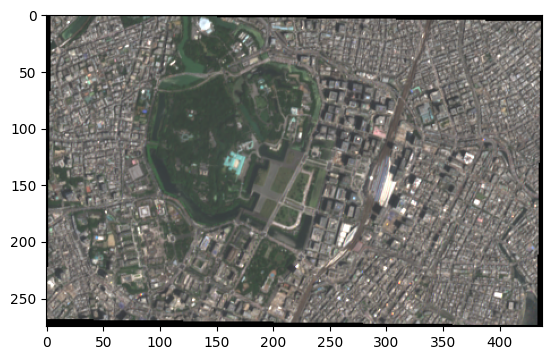

In [37]:
import matplotlib.pyplot as plt
from skimage import exposure

# これらの切り取ったデータをスタックして、3バンドの画像を作成する
out_image_crop = np.concatenate((out_image_crop_2, out_image_crop_1, out_image_crop_0), axis=0)

# 作成した3バンドの画像を表示する
out_image_display = np.rollaxis(out_image_crop, 0, 3)
out_image_display_normalized = out_image_display /5000
plt.imshow(out_image_display_normalized)
plt.show()